<font size = "5"> **Lecture 2:  [Information in STEM](https://github.com/gduscher/ML-ElectronMicroscopy-2023/tree/main/Lecture%202)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />

# Load a File


[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023/raw/main/Lecture%202/1_Load_File.ipynb) 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SergeiVKalinin/ML-ElectronMicroscopy-2023/blob/main/Lecture%202/1_Load_File.ipynb)

part of Online Course

<font size = "5"> **[Machine Learning in Scanning Electron Microscopy 2023](https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023)**</font>

<font size = "3"> **[Lecture 2](https://github.com/gduscher/ML-ElectronMicroscopy-2023/tree/main/Lecture%202)**</font>

by Gerd Duscher, 2023

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville




## Content

Short test to verify that files can be loaded.

This notebook uses an ipywidget to select a file.

We also test how to review a variety of ways how to upload files to google colab.

## Prerequesites

### Install packages

If you run this in Google Colab or if you want to test your local installation "run the code cell below" to ensure that [pyTEMlib](https://github.com/gduscher/pyTEMlib) and dependent packages are installed.



In [ ]:
import sys

from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = (get_distribution(package_name).version)
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version


# pyTEMlib setup ------------------
if test_package('pyTEMlib') < '0.2023.5.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/sidpy.git@main -q
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/SciFiReaders.git@main -q
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/pyTEMlib.git@use_dict_2 -q
    
# ------------------------------
print('done')

### Then we import the relevant packages
We will use a few packages of the pycroscopy ecosystem. 

Most obvious the file_tools of pyTEMlib. 

That package is based on 
- sidpy for data format in memory
- SciFiReaders for reading any file into a sidpy dataset
- pyNSID for storing data

A comprehensive overview will be provided in another lecture. 

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pylab as plt 

import sys
if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    from google.colab import drive

import pyTEMlib
from pyTEMlib import file_tools     # File input/ output library

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEMlib version: ', pyTEMlib.__version__)
    
__notebook__ = 'analyze_core_loss'
__notebook_version__ = '2023_05_25'

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
Qt dialogs are not available
pyTEMlib version:  0.2023.5.2


### Upload some File to Colab
Please note that this will not work under Microscoft Windows.

In [4]:
!wget -P example_data/ https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023/raw/main/example_data/EELS_STO.dm3
!wget -P example_data/ https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023/raw/main/example_data/AL-DFoffset0.00.dm3
!wget -P example_data/ https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023/raw/main/example_data/p1-hr3-ZnOonGraphite.dm3
!wget -P example_data/ https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023/raw/main/example_data/p1-hr4-ZnOonGraphite.dm3
!wget -P example_data/ https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023/raw/main/example_data/SrTiO3%20EELS%20low%20loss%20spectra.dm3
!wget -P example_data/ https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023/raw/main/example_data/SrTiO3collection-60muem.dm3
!wget -P example_data/ https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023/raw/main/example_data/SrTiO3%20EELS%20Ti%20and%20O%20spectra%2060mu%201s%200.2%20disp.dm3
!wget -P example_data/ https://github.com/SergeiVKalinin/ML-ElectronMicroscopy-2023/raw/main/example_data/STO-stack.h5

SyntaxError: incomplete input (2679881846.py, line 3)

In [2]:
%load_ext autoreload
%autoreload 2

sys.path.insert(0, '../../pyTEMlib')

## Load and plot any file

First a widget to select a file will apear.

Go to the relevant path and select a file (Nion-file names will be translated) as ''Main''.<br>
You can add any amount datasets with the add button. 

We use the SciFiReaders package of pycrosopy to read them.

The data of the file will be plotted in the next code cell

In [3]:
fileWidget = file_tools.FileWidget()

Selected dataset will be plotted. make sure to play around with the drop down menu above.

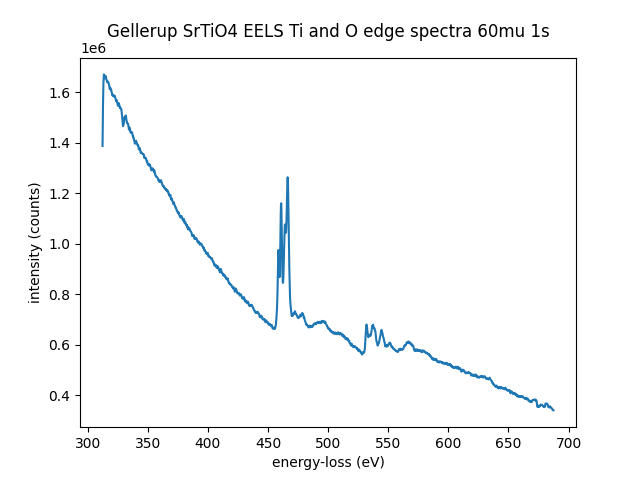

In [6]:
datasets = fileWidget.datasets

dataset = fileWidget.selected_dataset

view = dataset.plot()

In [14]:
print(dataset)
dataset

sidpy.Dataset of type IMAGE_STACK with:
 dask.array<array, shape=(25, 512, 512), dtype=float32, chunksize=(25, 512, 512), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
frame:  stack (frame) of size (25,)
y:  distance (nm) of size (512,)
x:  distance (nm) of size (512,)
 with metadata: ['experiment', 'filename']


sidpy.Dataset of type IMAGE_STACK with:
 dask.array<array, shape=(25, 512, 512), dtype=float32, chunksize=(25, 512, 512), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
frame:  stack (frame) of size (25,)
y:  distance (nm) of size (512,)
x:  distance (nm) of size (512,)
 with metadata: ['experiment', 'filename']

In [6]:
dataset.view_original_metadata()

ImageData :
	Calibrations :
		Brightness :
			Origin : 0.0
			Scale : 1.0
			Units : Counts
		Dimension :
			0 :
				Origin : 200.0
				Scale : 0.25
				Units : eV
		DisplayCalibratedUnits : 1
	Data : read
	DataType : 2
	Dimensions :
		0 : 2048
	PixelDepth : 4
ImageTags :
	Acquisition :
		Device :
			Active Size (pixels) : [2048, 520]
			Camera Number : 0
			CCD :
				Pixel Size (um) : [14.0, 14.0]
			Configuration :
				Transpose :
					Diagonal Flip : 0
					Horizontal Flip : 0
					Vertical Flip : 0
			Name : QUEFINA 1
			Source : QUEFINA 1
		Frame :
			Area :
				Transform :
					Class Name : cm_acquisitiontransform_list
					Transform List :
						0 :
							Binning : [1, 1]
							Class Name : cm_acquisitiontransform
							Sub Area Adjust : [0, 0, 0, 0]
							Transpose :
								Diagonal Flip : 0
								Horizontal Flip : 0
								Vertical Flip : 0
			CCD :
				Pixel Size (um) : [14.0, 14.0]
			Intensity :
				Transform :
					Class Name : cm_valuetransform_list
					Transform

In [7]:
dataset.view_metadata()

experiment :
	single_exposure_time : 0.01
	exposure_time : 63.0
	number_of_frames : 21
	collection_angle : 33.0
	convergence_angle : 30.0
	acceleration_voltage : 200000.0
filename : C:\Users\gduscher\Documents\Github\ML-ElectronMicroscopy-2023\example_data\1EELS_Acquire_low-loss.dm3


## Save File
We save files in the pyNSID data format. That data format is based on hdf5 format, modified for microscopy and machine learning needs.
See a later lecture by Rama.

In [15]:
h5_group = file_tools.save_dataset(datasets, 'test1.hf5')

C:\Users\gduscher\AppData\Local\anaconda3\envs\pyTEMlib\Lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


The return value is h5_group, a directory equivalent in hdf5 data format with some attributes

In [16]:
h5_group.file

<HDF5 file "test1.hf5" (mode r+)>

### Close the File

In [17]:
dataset.h5_dataset.file.close()